# Imports 

In [ ]:
pip install xgboost

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import xgboost as xgb

# Loading the Data 

In [3]:
online_np = pd.read_csv(r'C:\Users\Desktop\Capstone 2_OnlinePopularity\newspopularity.csv')

In [4]:
online_np.head()

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,DatePublished
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"['January 7, 2013']"
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"['January 7, 2013']"
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"['January 7, 2013']"
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"['January 7, 2013']"
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"['January 7, 2013']"


# Pre-processing

In [5]:
#Dropping columns:"unnamed: 0" and "url"
online_np = online_np.drop(columns=['Unnamed: 0','url'])

In [6]:
# Removing []
online_np['DatePublished'] = online_np['DatePublished'].str.strip('[]')

In [7]:
# Removong ''
online_np['DatePublished'] = online_np['DatePublished'].str.strip("''")

In [8]:
online_np.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,DatePublished
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"January 7, 2013"
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"January 7, 2013"
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"January 7, 2013"
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"January 7, 2013"
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"January 7, 2013"


In [9]:
# Converting DatePublished column from string to datetime 
online_np['DatePublished'] = pd.to_datetime(online_np.DatePublished)

In [10]:
online_np['DatePublished'].dtype

dtype('<M8[ns]')

In [11]:
# Setting Date Published as index 
online_np.set_index('DatePublished', inplace=True)
online_np.sort_index(inplace=True)

In [12]:
# Earliest article dates 
online_np.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
DatePublished,,,,,,,,,,,,,,,,,,,,,
2013-01-07,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
2013-01-07,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,...,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
2013-01-07,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,...,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
2013-01-07,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,...,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
2013-01-07,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,...,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


In [13]:
# Latest article dates
online_np.tail()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
DatePublished,,,,,,,,,,,,,,,,,,,,,
2023-05-24,193.0,9.0,713.0,0.416667,1.0,0.542923,11.0,5.0,3.0,0.0,...,0.100000,0.800000,-0.214484,-0.8,-0.033333,0.700000,0.366667,0.200000,0.366667,3600
2023-05-28,647.0,10.0,439.0,0.591549,1.0,0.746269,17.0,2.0,11.0,0.0,...,0.100000,0.600000,-0.289815,-0.6,-0.075000,0.450000,0.133333,0.050000,0.133333,805
2023-07-20,364.0,12.0,277.0,0.635688,1.0,0.776471,8.0,3.0,2.0,0.0,...,0.062500,0.500000,-0.218519,-0.4,-0.100000,0.000000,0.000000,0.500000,0.000000,595
NaT,448.0,7.0,172.0,0.525316,1.0,0.481203,3.0,2.0,11.0,1.0,...,0.285714,0.433333,-0.343750,-0.5,-0.187500,0.833333,0.433333,0.333333,0.433333,2700
NaT,21.0,13.0,363.0,0.600000,1.0,0.755760,13.0,6.0,1.0,0.0,...,0.100000,0.500000,-0.340179,-1.0,-0.071429,0.200000,0.050000,0.300000,0.050000,6800


In [14]:
# DF of article date and share 
date_shares = online_np['shares']
ds = date_shares.loc[date_shares.index <= '12-31-2014']

In [15]:
# Creating dataframe
ds = pd.DataFrame(ds)
ds.head()

,shares
DatePublished,
2013-01-07,593
2013-01-07,1300
2013-01-07,1100
2013-01-07,1600
2013-01-07,2400


# Train/ Test Split

### Splitting dataset into training and test 

In [16]:
train = ds.loc[ds.index < '09-01-2014']
test = ds.loc[ds.index >= '09-01-2014']

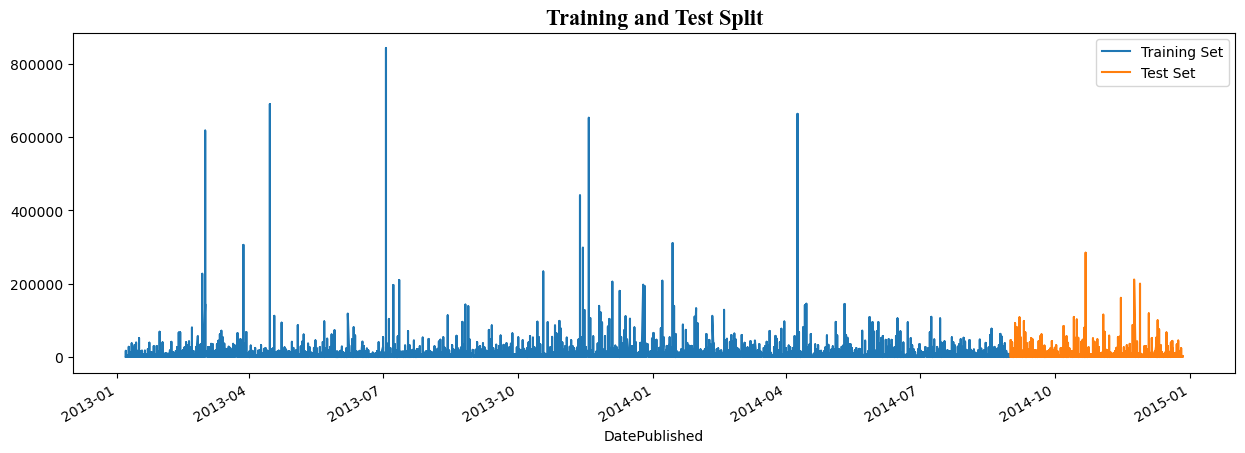

In [17]:
#Plotting train and test split 
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label="Test Set")
plt.title('Training and Test Split', fontsize=16, fontname="Times New Roman", fontweight="bold")
ax.legend(['Training Set', 'Test Set'])
plt.show()

### Cross Validation for Training 

In [18]:
from sklearn.model_selection import TimeSeriesSplit

In [19]:
# Creating time-series split 
tss = TimeSeriesSplit(n_splits=3, test_size=24*365*1, gap=24)
df = ds.sort_index()

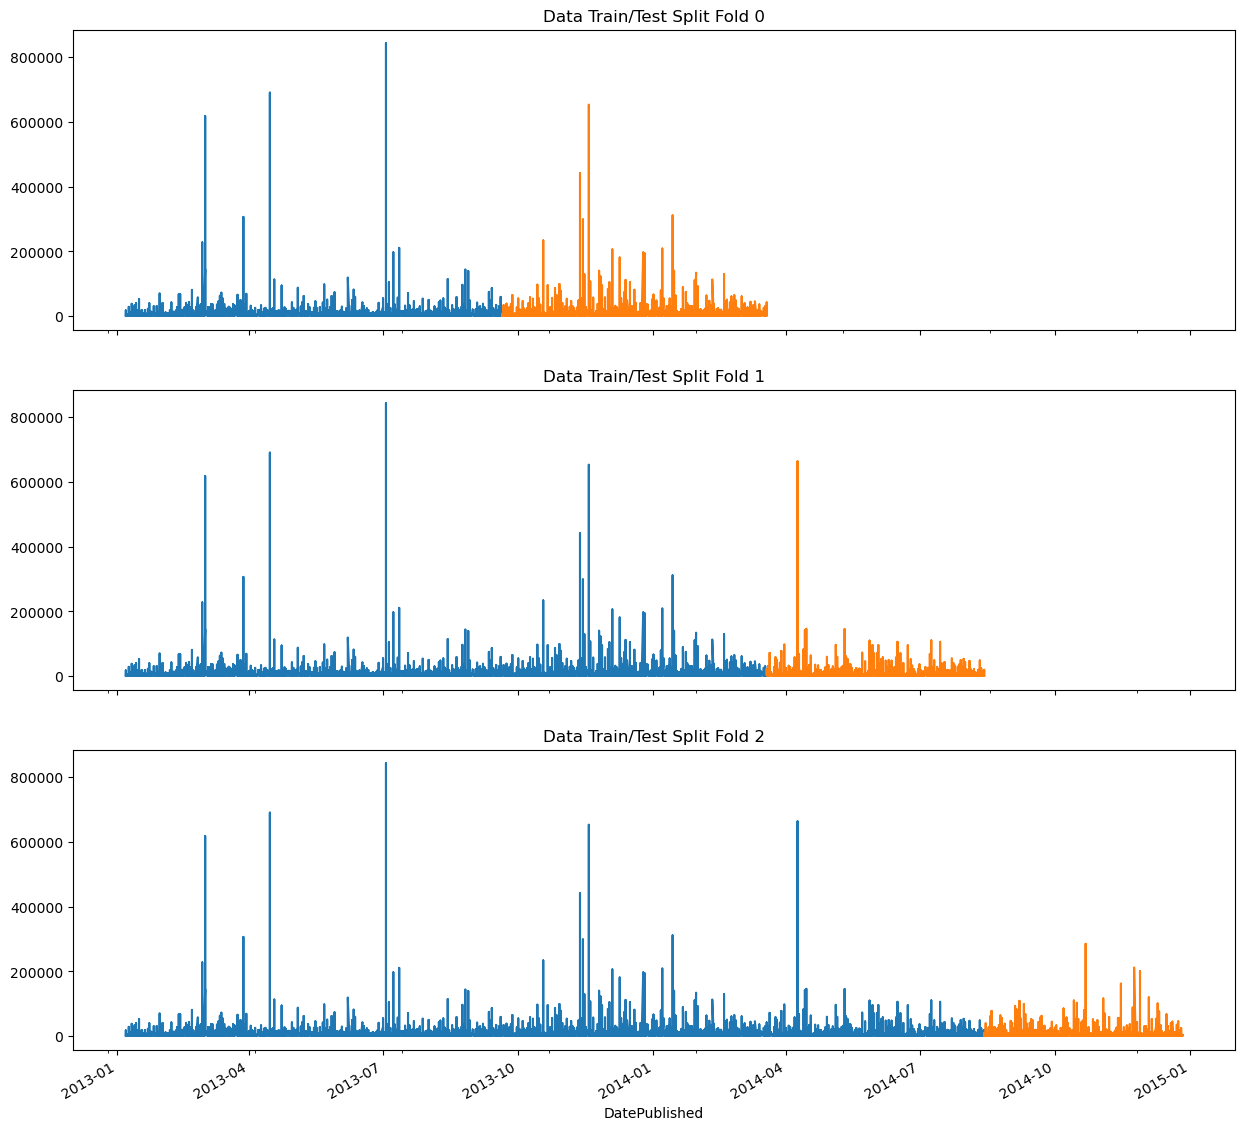

In [20]:
# Cross Validation Folds 
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['shares'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['shares'].plot(ax=axs[fold],
                         label='Test Set')
    fold += 1
plt.show()
   

### Feature Creation for model 

In [21]:
def createfeatures(df):
    """
    Creating time series features based on time series index
    """
    df = df.copy()
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day of week'] = df.index.dayofweek
    return df

In [22]:
df = createfeatures(ds)

In [23]:
df.head()

,shares,day,month,year,day of week
DatePublished,,,,,
2013-01-07,593,7,1,2013,0
2013-01-07,1300,7,1,2013,0
2013-01-07,1100,7,1,2013,0
2013-01-07,1600,7,1,2013,0
2013-01-07,2400,7,1,2013,0


In [24]:
art_shares = pd.merge(df,online_np, left_index=True, right_index=True)

In [25]:
art_shares.head()

,shares_x,day,month,year,day of week,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_y
DatePublished,,,,,,,,,,,,,,,,,,,,,
2013-01-07,593,7,1,2013,0,731.0,12.0,219.0,0.663594,1.0,...,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
2013-01-07,593,7,1,2013,0,731.0,8.0,130.0,0.821705,1.0,...,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
2013-01-07,593,7,1,2013,0,731.0,9.0,474.0,0.608602,1.0,...,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
2013-01-07,593,7,1,2013,0,731.0,10.0,555.0,0.535390,1.0,...,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
2013-01-07,593,7,1,2013,0,731.0,9.0,1115.0,0.424132,1.0,...,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


In [26]:
art_shares = art_shares.drop(columns=['shares_x'])

In [27]:
art_shares.head()

,day,month,year,day of week,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_y
DatePublished,,,,,,,,,,,,,,,,,,,,,
2013-01-07,7,1,2013,0,731.0,12.0,219.0,0.663594,1.0,0.815385,...,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
2013-01-07,7,1,2013,0,731.0,8.0,130.0,0.821705,1.0,0.922078,...,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
2013-01-07,7,1,2013,0,731.0,9.0,474.0,0.608602,1.0,0.802158,...,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
2013-01-07,7,1,2013,0,731.0,10.0,555.0,0.535390,1.0,0.708824,...,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
2013-01-07,7,1,2013,0,731.0,9.0,1115.0,0.424132,1.0,0.564539,...,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


In [28]:
art_shares = art_shares.rename(columns={"shares_y": "shares"})

In [29]:
art_shares.head()

,day,month,year,day of week,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
DatePublished,,,,,,,,,,,,,,,,,,,,,
2013-01-07,7,1,2013,0,731.0,12.0,219.0,0.663594,1.0,0.815385,...,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
2013-01-07,7,1,2013,0,731.0,8.0,130.0,0.821705,1.0,0.922078,...,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
2013-01-07,7,1,2013,0,731.0,9.0,474.0,0.608602,1.0,0.802158,...,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
2013-01-07,7,1,2013,0,731.0,10.0,555.0,0.535390,1.0,0.708824,...,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
2013-01-07,7,1,2013,0,731.0,9.0,1115.0,0.424132,1.0,0.564539,...,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


# Modeling 

In [30]:
train = art_shares.loc[art_shares.index < '09-01-2014']
test = art_shares.loc[art_shares.index >= '09-01-2014']

In [31]:
X = art_shares.drop(columns=['shares'])
y = art_shares['shares']

In [32]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*365*1, gap=24)

### XGBoost Regression

In [34]:
df = art_shares.sort_index()

In [35]:
for train_index, test_index in tss.split(df):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [36]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=500,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)

In [38]:
reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=10)

[21:26:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11623.29418	validation_1-rmse:5819.23271
[10]	validation_0-rmse:11432.91854	validation_1-rmse:5644.26429
[20]	validation_0-rmse:11226.75675	validation_1-rmse:5495.96412
[30]	validation_0-rmse:11061.60857	validation_1-rmse:5373.07297
[40]	validation_0-rmse:10927.77888	validation_1-rmse:5271.65225
[50]	validation_0-rmse:10819.08026	validation_1-rmse:5189.72656
[60]	validation_0-rmse:10730.54843	validation_1-rmse:5121.33324
[70]	validation_0-rmse:10640.61194	validation_1-rmse:5059.88566
[80]	validation_0-rmse:10564.26854	validation_1-rmse:5011.57006
[90]	validation_0-rmse:10497.38546	validation_1-rmse:4976.97327
[100]	validation_0-rmse:10435.52843	validation_1-rmse:4950.90617
[110]	validation_0-rmse:10379.28115	validation_1-rmse:4930.02901
[120]	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

### Evautation Metrics

###### Mean Squared Error 

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
y_pred = reg.predict(X_test)

score = np.sqrt(mean_squared_error(y_test, y_pred))

In [41]:
print(f'Score across folds: {np.mean(score):0.5f}')
print(f'Fold scores: {score}')

Score across folds: 4825.39180
Fold scores: 4825.391802748487


# Feature Importance

In [45]:
importance = reg.feature_importances_

In [46]:
feature_importance =  pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

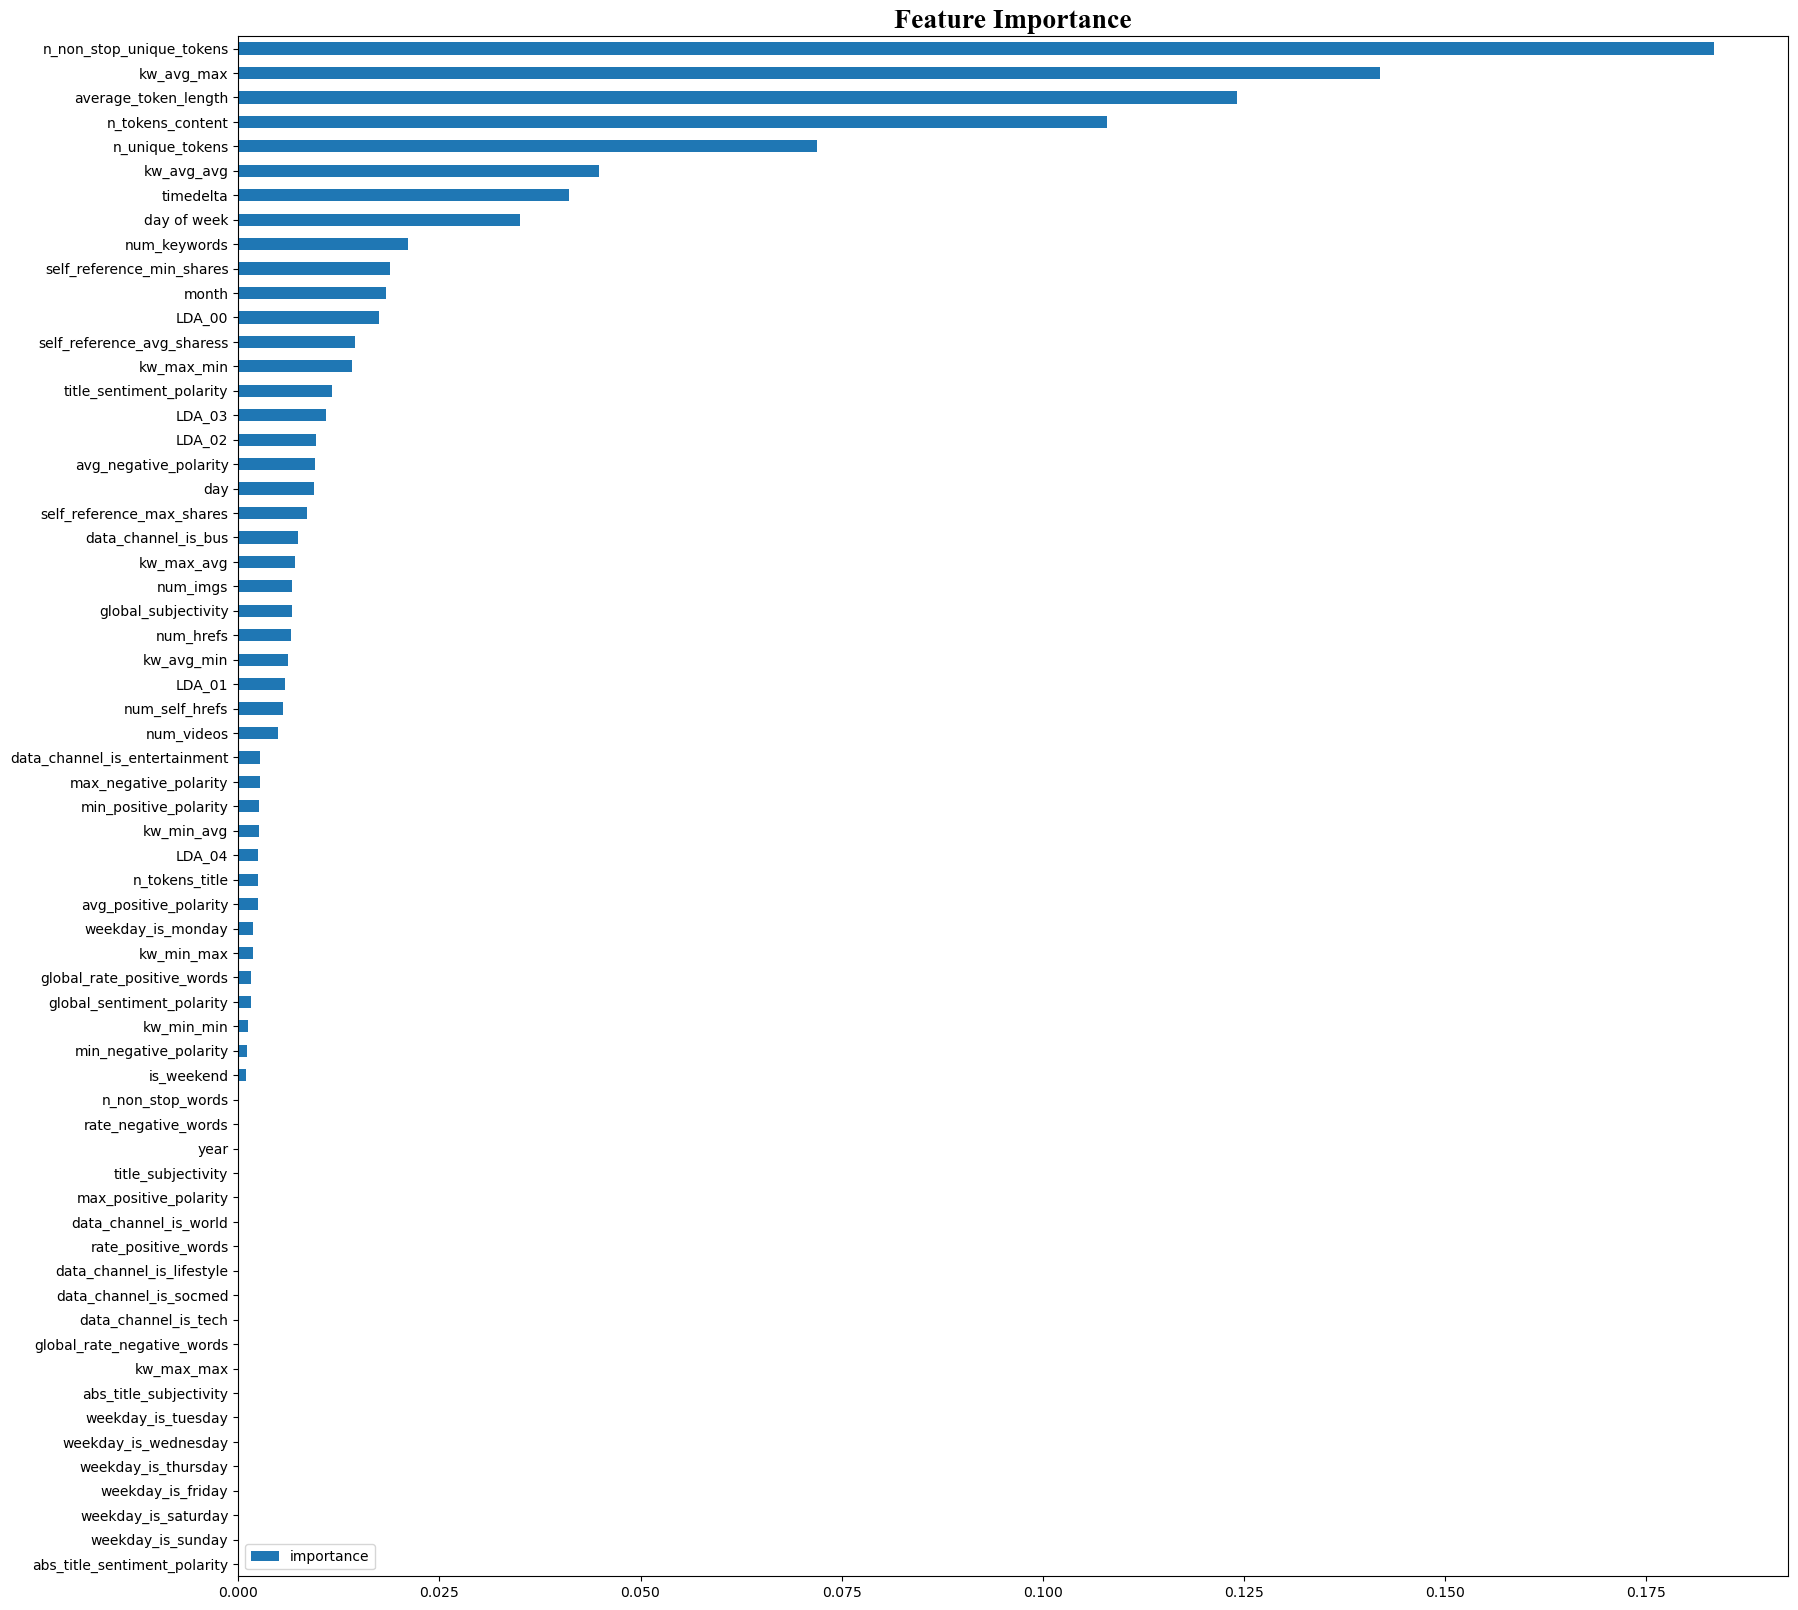

In [54]:
feature_importance.sort_values('importance').plot(kind='barh', figsize=(20,20))
plt.title('Feature Importance',fontname="Times New Roman", fontweight="bold", fontsize=20)
plt.show()

In [55]:
feature_importance.value_counts(ascending=True)

importance
0.006734       1
0.008565       1
0.009475       1
0.009498       1
0.009707       1
0.010959       1
0.011654       1
0.014194       1
0.014482       1
0.007431       1
0.017529       1
0.018851       1
0.021155       1
0.035022       1
0.041154       1
0.044798       1
0.071897       1
0.107914       1
0.124106       1
0.018359       1
0.007100       1
0.183452       1
0.006683       1
0.001028       1
0.001099       1
0.001223       1
0.001600       1
0.001629       1
0.001822       1
0.001832       1
0.002470       1
0.002492       1
0.002520       1
0.002532       1
0.002536       1
0.002710       1
0.002726       1
0.004973       1
0.005541       1
0.005860       1
0.006248       1
0.006559       1
0.141879       1
0.000000      20
dtype: int64

# Forecasting 

In [71]:
df = createfeatures(df)

FEATURES = ['day','month','year','day of week']
TARGET = 'shares'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=200,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=25)

[22:36:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11619.81474
[25]	validation_0-rmse:11434.82546
[50]	validation_0-rmse:11321.19092
[75]	validation_0-rmse:11251.38315
[100]	validation_0-rmse:11208.60044
[125]	validation_0-rmse:11182.38366
[150]	validation_0-rmse:11166.09717
[175]	validation_0-rmse:11156.09949
[199]	validation_0-rmse:11149.84964


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [72]:
df.index.max()

Timestamp('2014-12-27 00:00:00')

In [73]:
# Create future dates 
future = pd.date_range('2014-12-27','2015-12-31')
future 

DatetimeIndex(['2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=370, freq='D')

In [74]:
# Creating Dateframe of future dates 
future = pd.DataFrame(index=future)
future['Future'] = True
df['Future'] = False

#Merge of present and future dates 
dates_future = pd.concat([df, future])
dates_future = createfeatures(dates_future)

In [75]:
future_final = dates_future.query('Future').copy()

###### Predicting the Future 

In [76]:
future_final['pred'] = reg.predict(future_final[FEATURES])

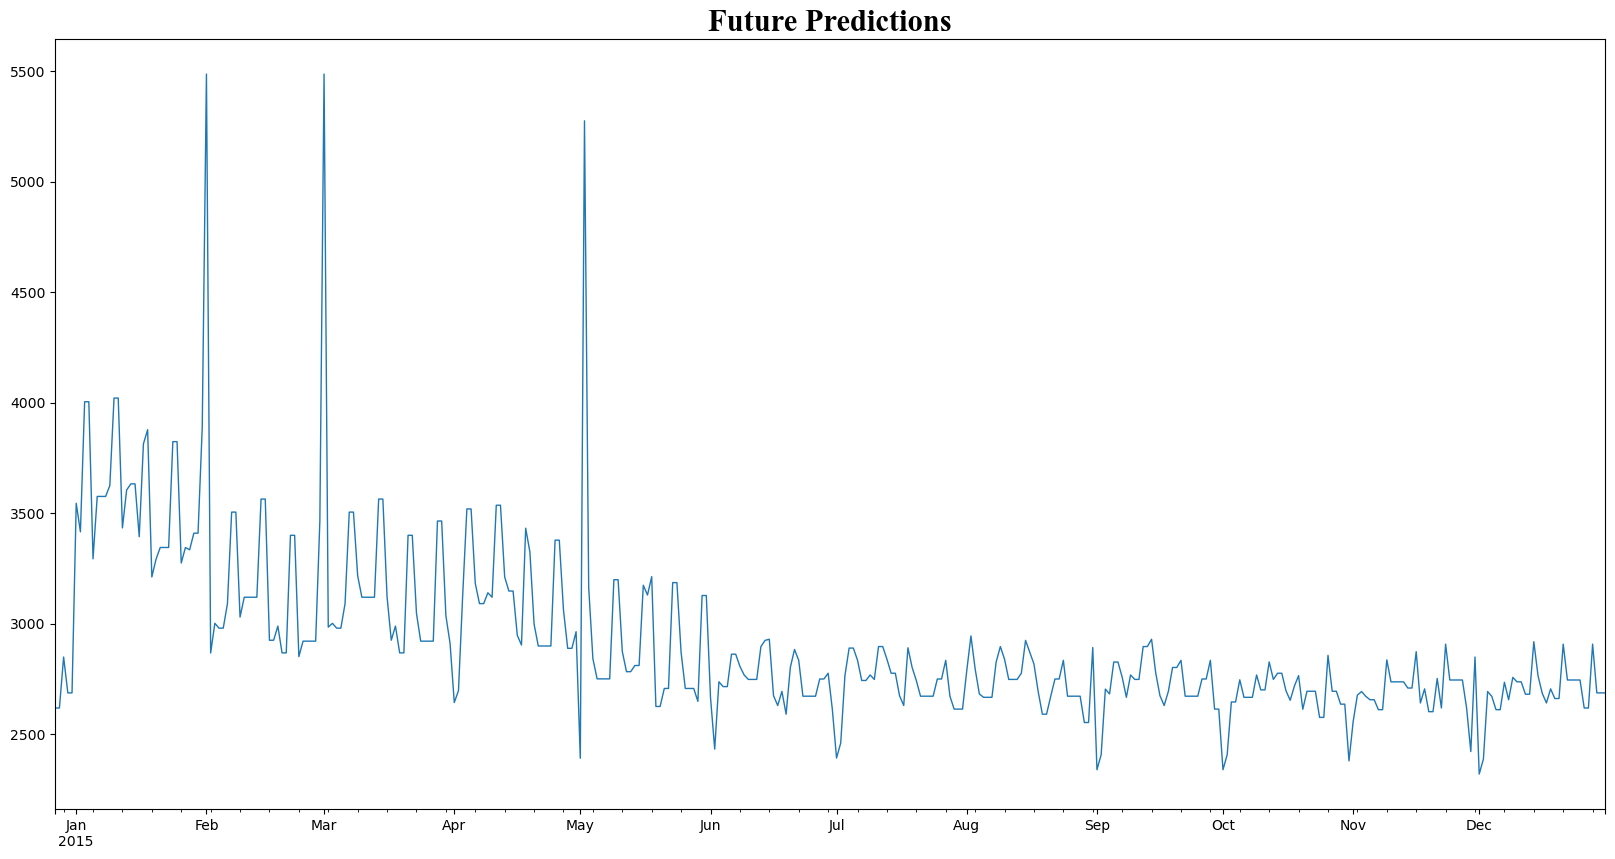

In [77]:
#Plot of future predictions 
future_final['pred'].plot(figsize=(20, 10),ms=1,lw=1)
plt.title('Future Predictions',fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.show()

# Summary

<u>Pre-processing<u/>
    
To get the dataframe ready for training and modeling a few things needed to be changed. First removed the columns Unnamed: 0',' and ‘url’ as they were not important to the model. Then proceed to change the ‘Date Published’ column from a string to a datetime. Next set the ‘Date Published’ column as the index of the dataframe. Last, created a dataframe of just the article shares and date published. 

<u>Modeling<u/>
    
I split the data using the date September 1, 2014 as the split. All dates before September 1, 2014 were used for training and the dates after were used for testing. Before modeling I cross validated the dataset. After cross validation, created additional features for the model being: day, month, year and day of week. Used sklearn time series split function to split the data using 3 splits with a 24 hour gap between the dates.The model I chose was XGBoost. I evaluated the model using the mean squared error. The model scored 4825.39. Opon analyzed feature importance, the rate of unique non-stop words in the content was of most importance with a score of 0.006734. Followed by Best keyword (avg. shares) and average length of the words in the content. Even though day of the week was in the top ten features, surprisingly the only day of the week which scored any significant importance was Monday. Showing an indication that Mondays may be a good day to post.  From all the channels( genre), business was was the highest.  


<u>Forecasting<u/>
    
In order to forecast future trends, I retain the model but specifically on the features: day, month, year and day of week.  The future model predicts a decreasing seasonal pattern in 2015. With the lowest shares appearing in November 2015. Extreme high peaks were noted in months February, March, and May. The last four months of the year had minor dips in each month. 
